In [102]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [103]:
# 使用Tab进行变量名自动补全

# neural network class definition
class neuralNetwork:
    # 分为initialize, train, query三层神经网络
    
    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # 参数分别为分布中心值， 标准方差和矩阵大小
        self.wih = numpy.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # target_list指期望(y)
        #矩阵的点乘：对应元素相乘
        
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        

In [23]:
# # number of input, hidden and output nodes
# input_nodes = 3
# hidden_nodes = 3
# output_nodes = 3

# # learning rate is 0.3
# learning_rate = 0.3

# # create instance of neural network
# n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [77]:
# n.query([1.0, 0.5, -1.5])

In [25]:
# data_file = open("G:/code/a-guide-to-deep-learning/mnist_train_100.csv", 'r')
# data_list = data_file.readlines()
# data_file.close()

In [78]:
# len(data_list)

In [76]:
# data_list[0]

In [75]:
# # 以逗号为标记拆分
# all_values = data_list[0].split(',')
# # 忽略第一个标签值
# # numpy.asfarray()将文本字符串转换为实数，并创建数组
# image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
# matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [74]:
# # 数据预处理，将数据缩放到[0.01~1]
# scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
# print(scaled_input)

In [42]:
# #output nodes is 10 (example)
# onodes = 10
# targets = numpy.zeros(onodes) + 0.01
# # test
# targets[int(all_values[0])] = 0.99

In [79]:
# print(targets)

In [129]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.2
learning_rate = 0.2

In [130]:
# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [131]:
# load the mnist training data CSV file into a list
training_data_file = open("G:/code/a-guide-to-deep-learning/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [132]:
count = 0;
for record in training_data_list:
    
    count += 1
    
    # split the record by the ',' commas
    all_values = record.split(',')
    
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    
    if count % 10000 == 0:
        print('I have trained %s rounds' % (count))

I have trained 10000 rounds
I have trained 20000 rounds
I have trained 30000 rounds
I have trained 40000 rounds
I have trained 50000 rounds
I have trained 60000 rounds


In [133]:
# load the mnist test data CSV file into a list
test_data_file = open("G:/code/a-guide-to-deep-learning/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [134]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


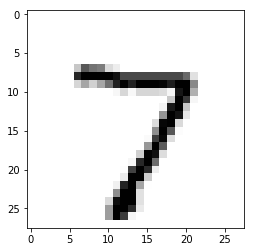

In [135]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [136]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[ 0.02971802],
       [ 0.00923075],
       [ 0.00174019],
       [ 0.00486107],
       [ 0.00508704],
       [ 0.00205413],
       [ 0.00485682],
       [ 0.9936156 ],
       [ 0.00486067],
       [ 0.00828417]])

In [137]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:

    # split the record by the ',' commas
    all_values = record.split(',')
    
    # correct answer is first value
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # query the network
    outputs = n.query(inputs)
    
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    
    # append correct or incorrect to list
    if (label == correct_label):
        
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    
    else:
        
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

8 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
8 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
8 correct label
3 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
8

5 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
5 network's answer
2 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
3 network's answer
5 correct label
4 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
1 correct label
2 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1

9 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
2 correct label
6 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4

3 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
7 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5

0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
4 correct label
4 ne

5 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
7

0 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
9

1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
7 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1

5 correct label
5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
9 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
7 correct label
3 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
6 correct label
5 network's answer
7 correct label
7 ne

2 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
6 correct label
5 network's answer
1 correct label
9 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
9

9 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
7 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
6

8 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 ne

0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 ne

1 network's answer
0 correct label
0 network's answer
5 correct label
6 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
9 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
5 correct label
3 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
0

9 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3

3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
0 network's answer
7 correct label
7 network's answer
3 correct label
3 ne

3 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
6 correct label
6 ne

3 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
3 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6

8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4

2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9

0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6

2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
9

8 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
7 correct label
9 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
5

1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
9 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
8 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4

In [138]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [140]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9496


In [ ]:
# 在一个数据集上训练一次称为一个epoch

In [141]:
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 2

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        
        # split the record by the ',' commas
        all_values = record.split(',')
        
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        # pass用作占位符 
        pass
    pass

In [154]:
import scipy.misc

# 使用flatten将图像编程简单的浮点数组
# 如果图像是彩色的，那么颜色值将被转换为所需要的灰度
image_file_route = "G:/code/a-guide-to-deep-learning/mine.png"
img_array = scipy.misc.imread(image_file_route, flatten=True)

# 重塑数组，将其从28X28的方块数组变成很长的一串数值
img_data=255.0-img_array.reshape(784)
img_data=(img_data / 255.0 * 0.99) + 0.01

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


6


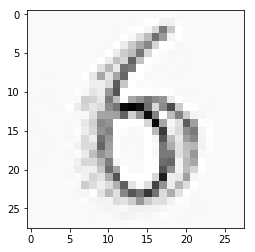

In [155]:
# show自己手写的数字
image_array = numpy.asfarray(img_data).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

# 对自己手写的数字进行query()
n.query(img_data)
label = numpy.argmax(outputs)
print(label)

** 反向查询的案例 **

In [156]:
import numpy
# scipy.special for the sigmoid function expit(), and its inverse logit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [157]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [158]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [159]:
# load the mnist training data CSV file into a list
training_data_file = open("G:/code/a-guide-to-deep-learning/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [161]:

# train the neural network# train 

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    print("It has been %s epochs" % (e))
    pass

It has been 0 epochs
It has been 1 epochs
It has been 2 epochs
It has been 3 epochs
It has been 4 epochs


In [162]:
# load the mnist test data CSV file into a list
test_data_file = open("G:/code/a-guide-to-deep-learning/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [163]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [164]:
# calculate the performance score, the fraction of correct answers# calcu 
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9733


[ 0.99  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01]


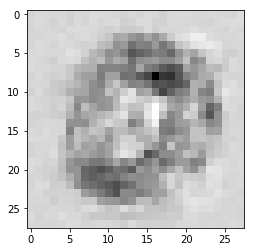

In [165]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 0
# create the output signals for this label
targets = numpy.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

** 将原始图片沿顺时针方向和逆时针方向各旋转10度，增加训练样本，提高预测精度 **

In [167]:
# scipy.ndimage for rotating image arrays
import scipy.ndimage

In [ ]:
# train the neural network# train 

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        # rotated anticlockwise by 10 degrees
        inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        n.train(inputs_minus10_img.reshape(784), targets)
        
        pass
    pass